In [2]:
import tfscreen
from tfscreen.plot import heatmap
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Manual heatmaps

Generate heat maps using the you-have-to-do-everything-yourself function

In [3]:
theta_file = "theta.csv"

# Load dataframe and make genotype into categorical
df = tfscreen.util.read_dataframe(theta_file)
df = tfscreen.genetics.set_categorical_genotype(df)

In [4]:

# Expand the genotype into columns
out_df = tfscreen.genetics.expand_genotype_columns(df)

# Get a dataframe with only single mutants
single_df = out_df[out_df["num_muts"] == 1].reset_index(drop=True)
single_df["resid_1"] = single_df["resid_1"].astype(int)
single_df = (single_df
             .rename(columns={"wt_aa_1":"wt_aa",
                              "resid_1":"resid",
                              "mut_aa_1":"mut_aa"})
             .drop(columns=["wt_aa_2","resid_2","mut_aa_2"])
             .sort_values(by=["resid","mut_aa"],
                          ascending=[True,False])
            )

single_df


,genotype,wt_aa,resid,mut_aa,wt_aa_3,resid_3,mut_aa_3,num_muts,titrant_name,titrant_conc,...,name,guess,transform,scale_mu,scale_sigma,idx,lower_bounds,upper_bounds,censored,fixed
104,H29Y,H,29,Y,NaN,<NA>,NaN,1,iptg,0.0000,...,theta_H29Y_iptg_0.0,1.000000,dummy,0.0,1.0,10,-inf,inf,False,False
105,H29Y,H,29,Y,NaN,<NA>,NaN,1,iptg,0.0001,...,theta_H29Y_iptg_0.0001,0.999960,dummy,0.0,1.0,11,-inf,inf,False,False
106,H29Y,H,29,Y,NaN,<NA>,NaN,1,iptg,0.0010,...,theta_H29Y_iptg_0.001,0.996037,dummy,0.0,1.0,12,-inf,inf,False,False
107,H29Y,H,29,Y,NaN,<NA>,NaN,1,iptg,0.0030,...,theta_H29Y_iptg_0.003,0.965431,dummy,0.0,1.0,13,-inf,inf,False,False
108,H29Y,H,29,Y,NaN,<NA>,NaN,1,iptg,0.0100,...,theta_H29Y_iptg_0.01,0.715383,dummy,0.0,1.0,14,-inf,inf,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7563,M98A,M,98,A,NaN,<NA>,NaN,1,iptg,0.0030,...,theta_M98A_iptg_0.003,0.965431,dummy,0.0,1.0,19,-inf,inf,False,False
7564,M98A,M,98,A,NaN,<NA>,NaN,1,iptg,0.0100,...,theta_M98A_iptg_0.01,0.715383,dummy,0.0,1.0,20,-inf,inf,False,False
7565,M98A,M,98,A,NaN,<NA>,NaN,1,iptg,0.0300,...,theta_M98A_iptg_0.03,0.218308,dummy,0.0,1.0,21,-inf,inf,False,False
7566,M98A,M,98,A,NaN,<NA>,NaN,1,iptg,0.1000,...,theta_M98A_iptg_0.1,0.024519,dummy,0.0,1.0,22,-inf,inf,False,False


In [5]:
# You can customize the axes using x_axis_kwargs and y_axis_kwargs. The 
# available options are here
from tfscreen.plot.heatmap.heatmap_core import _format_axis
help(_format_axis)

Help on function _format_axis in module tfscreen.plot.heatmap.heatmap_core:

_format_axis(ax: matplotlib.axes._axes.Axes, tick_labels: Sequence[str], tick_values: numpy.ndarray, axis_key: Literal['x', 'y'], max_num_ticks: Optional[int] = None, tick_length: Optional[float] = None, label_font: str = 'Courier New', label_font_size: int = 20, label_horizontal_alignment: str = 'center') -> None
    Apply tick and label formatting to a specified Matplotlib axis.

    This function serves as a generic wrapper to format either the x- or y-axis
    of a heatmap. It uses the `_get_ticks` helper to select an appropriate
    number of ticks to display and then applies various font and style
    properties to the axis labels and ticks.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The Axes object to format.
    tick_labels : Sequence[str]
        The complete list of labels for the axis.
    tick_values : numpy.ndarray
        The grid boundary coordinates corresponding to th

In [6]:
# There are a bunch of options. If you want to customize squares, check out `heatmap_patch_kwargs`. 
help(heatmap)

Help on function heatmap in module tfscreen.plot.heatmap.heatmap_core:

heatmap(plot_df: pandas.core.frame.DataFrame, color_fcn: Union[str, Callable, matplotlib.colorizer._ScalarMappable] = 'pink_r', vlim: Optional[Tuple[float, float]] = None, cmap_scale: Literal['linear', 'log'] = 'linear', height: Optional[float] = None, width: Optional[float] = None, btwn_square_space: float = 0, grid: bool = False, grid_kwargs: Optional[dict] = None, plot_scale: bool = True, heatmap_patch_kwargs: Optional[dict] = None, missing_value_color: Union[str, tuple, NoneType] = None, heatmap_as_img: bool = False, x_axis_type: str = 'site', y_axis_type: str = 'aa', x_axis_kwargs: Optional[dict] = None, y_axis_kwargs: Optional[dict] = None, x_offset: float = 0, y_offset: float = 0, ax: Optional[matplotlib.axes._axes.Axes] = None) -> Tuple[matplotlib.figure.Figure, matplotlib.axes._axes.Axes]
    Create a heatmap from a matrix-like DataFrame.

    This function serves as a core plotter for visualizing a 2D mat

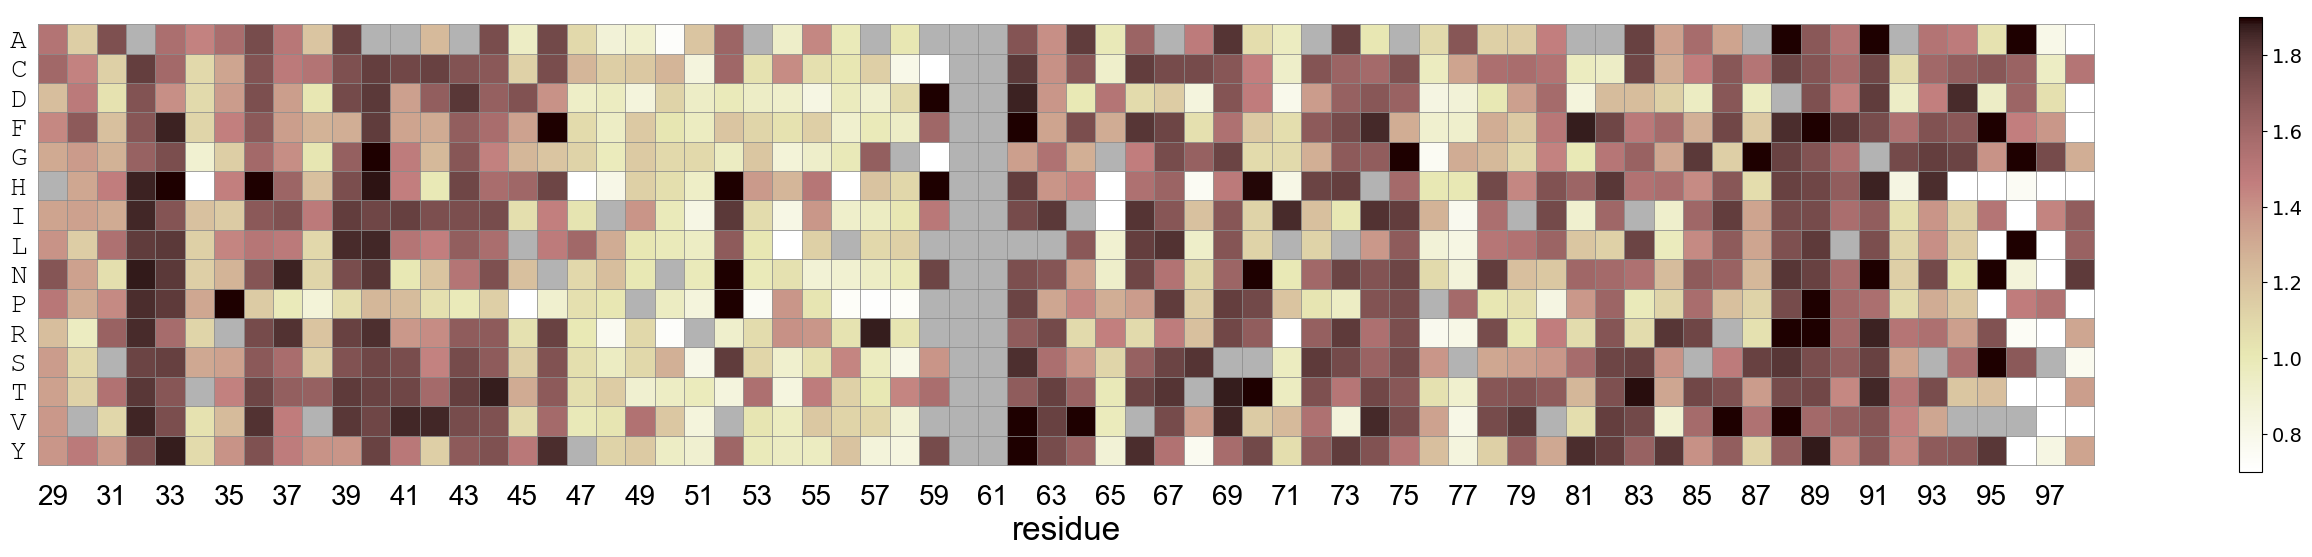

In [7]:
# Manually create a heatmap of theta at iptg = 0.0

# Grab dataframe at iptg = 0
to_plot_df = single_df[single_df["titrant_conc"] == 0.0]

# Put amino acids in columns and residues in rows.
for_hm = to_plot_df.pivot_table(index="resid",
                                columns="mut_aa",
                                values="theta_est")
# Reverse-sort on columns so amino acids go top to bottom sorted
for_hm = for_hm[for_hm.columns[::-1]]

# Make sure residues are continuous
for_hm = for_hm.reindex(np.arange(np.min(for_hm.index),
                                  np.max(for_hm.index)+1))

# Create plot
fig, ax = heatmap(for_hm,
                  color_fcn="pink_r", # any matplotlib color gradient
                  vlim=[0.7,1.9],     # <- this sets the color span to match wildtype min/max
                  plot_scale=True,
                  x_axis_kwargs={"max_num_ticks":50}, #<- sets denser residue numbers
                  grid=True,
                 )
ax.set_xlabel("residue",size=24,font="Arial")
fig.tight_layout()
#fig.savefig(f"hm.pdf")
plt.show()

[0.e+00 1.e-04 1.e-03 3.e-03 1.e-02 3.e-02 1.e-01 1.e+00]


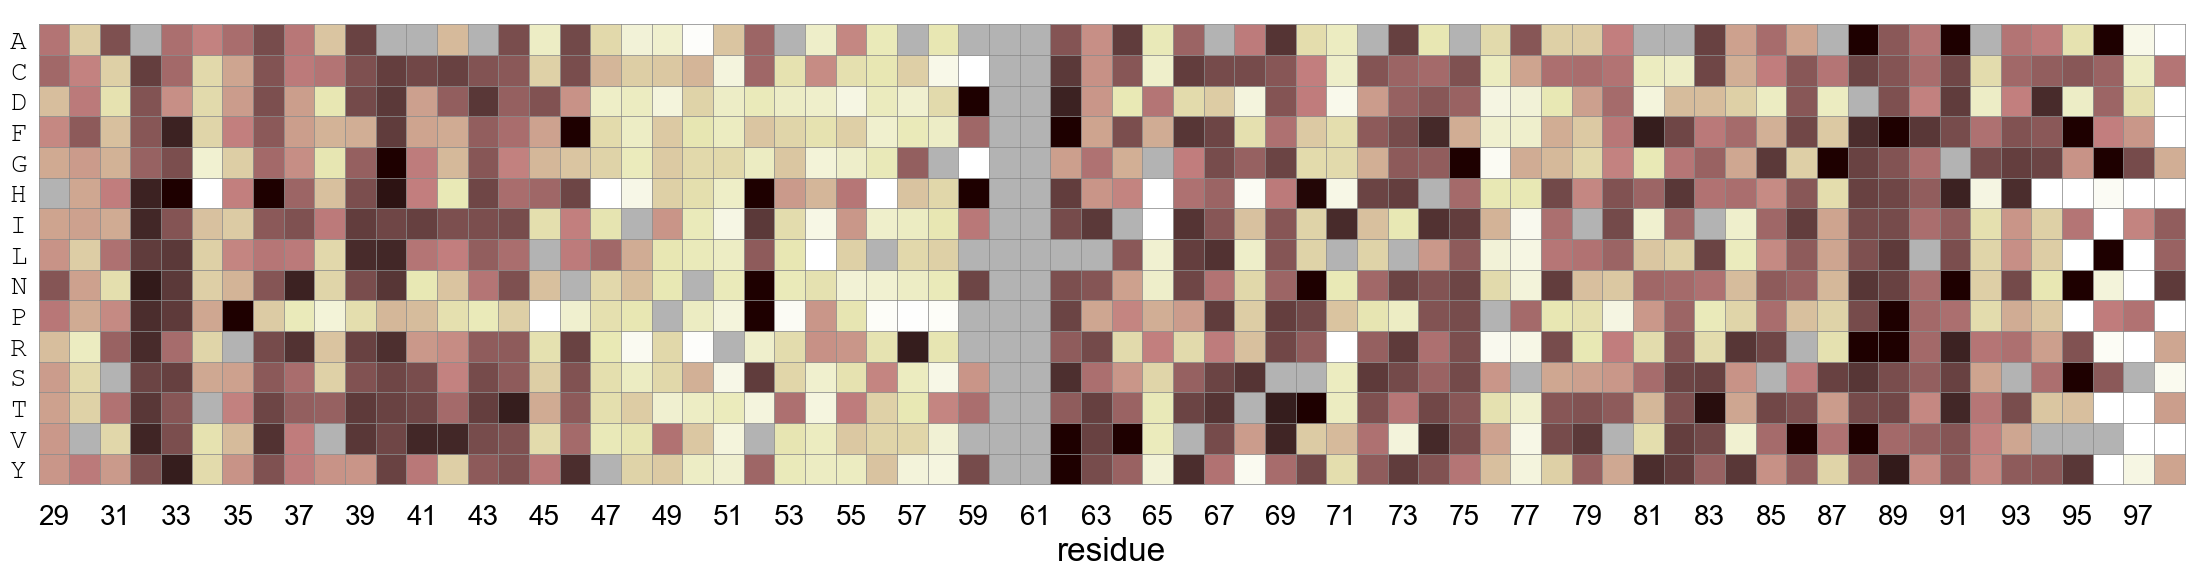

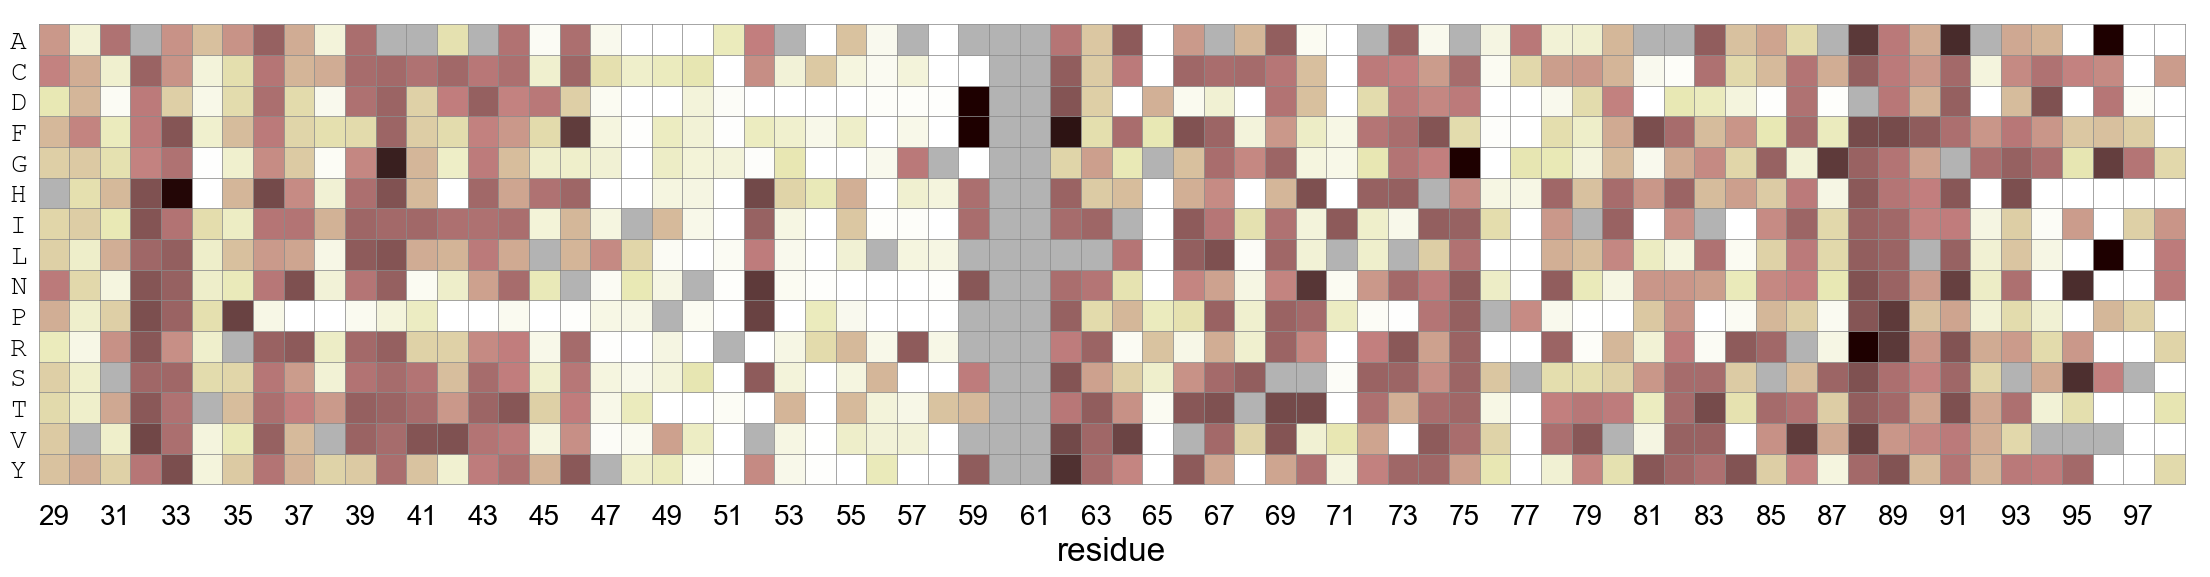

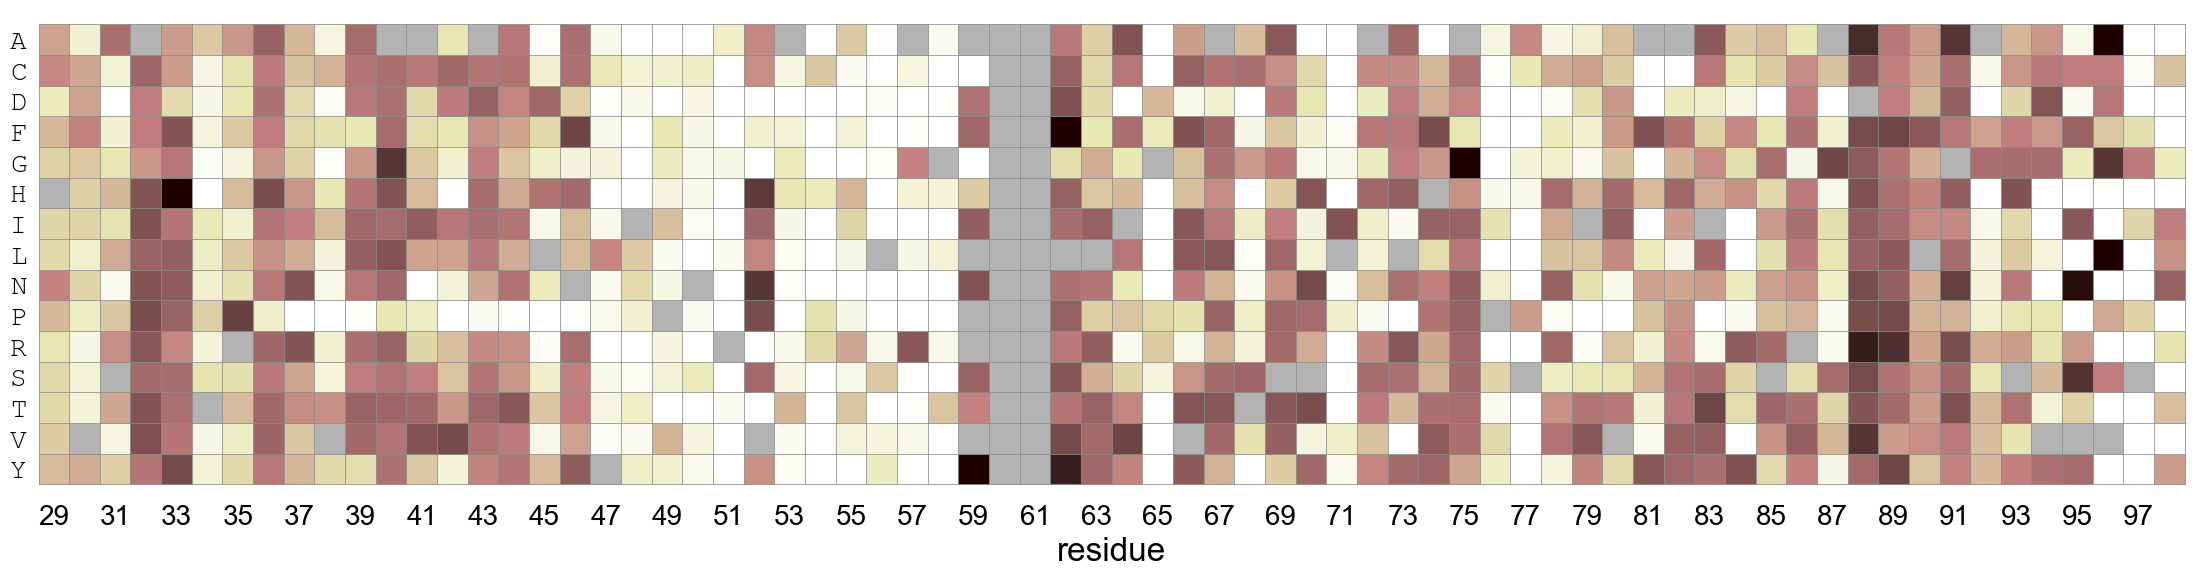

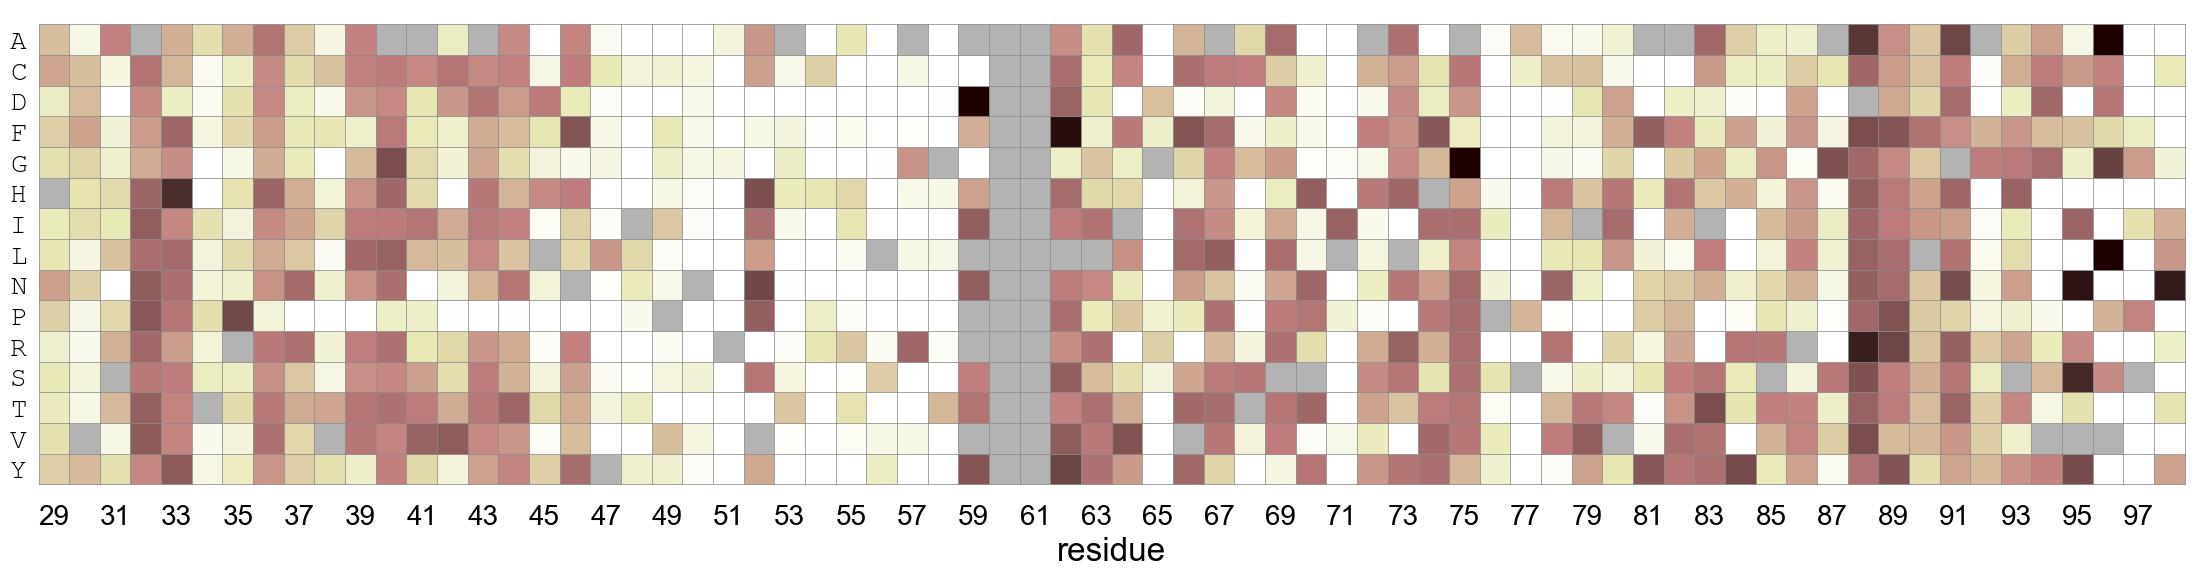

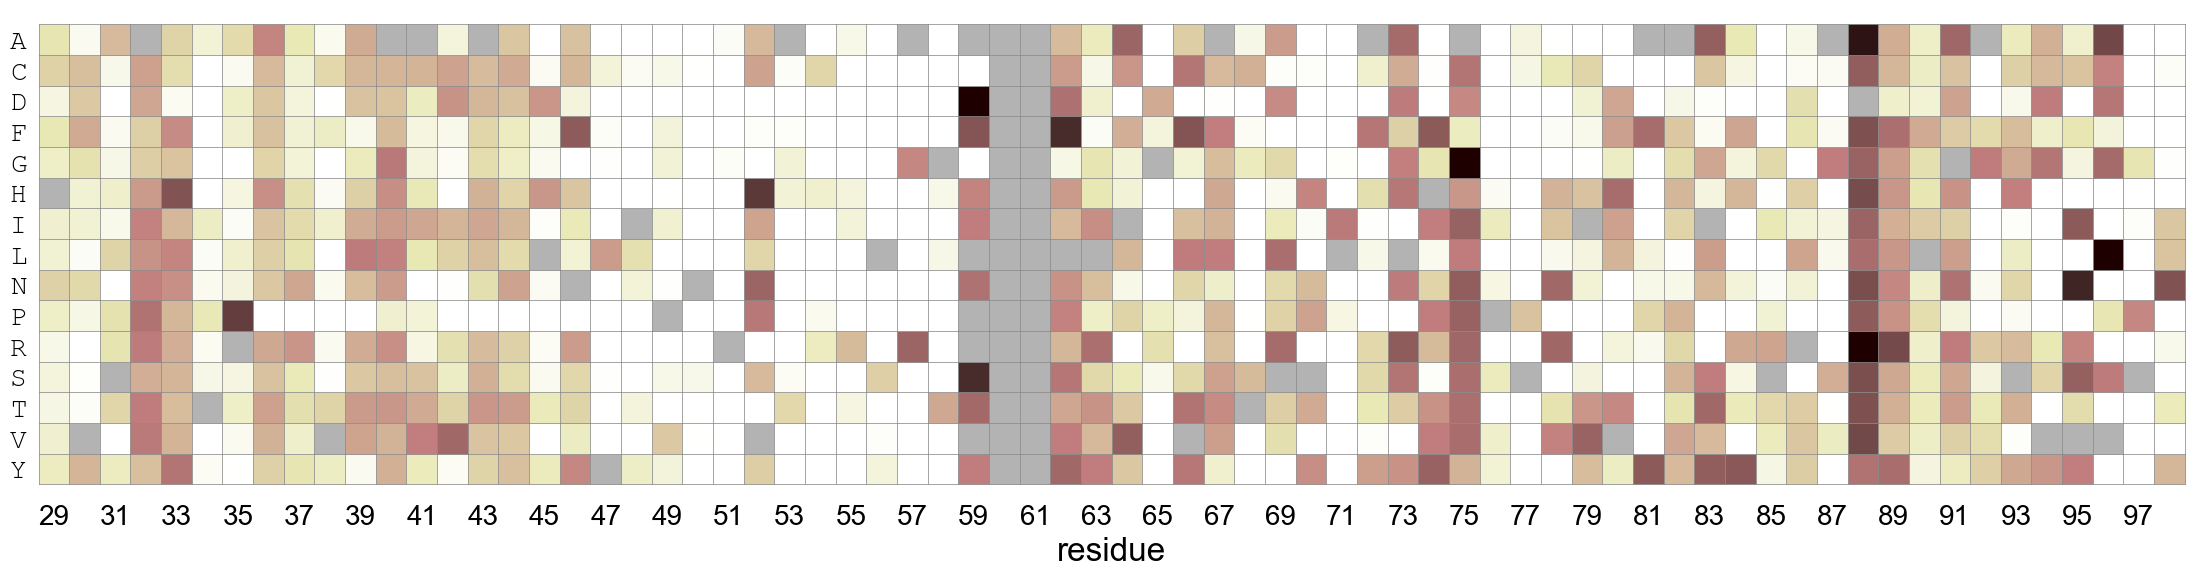

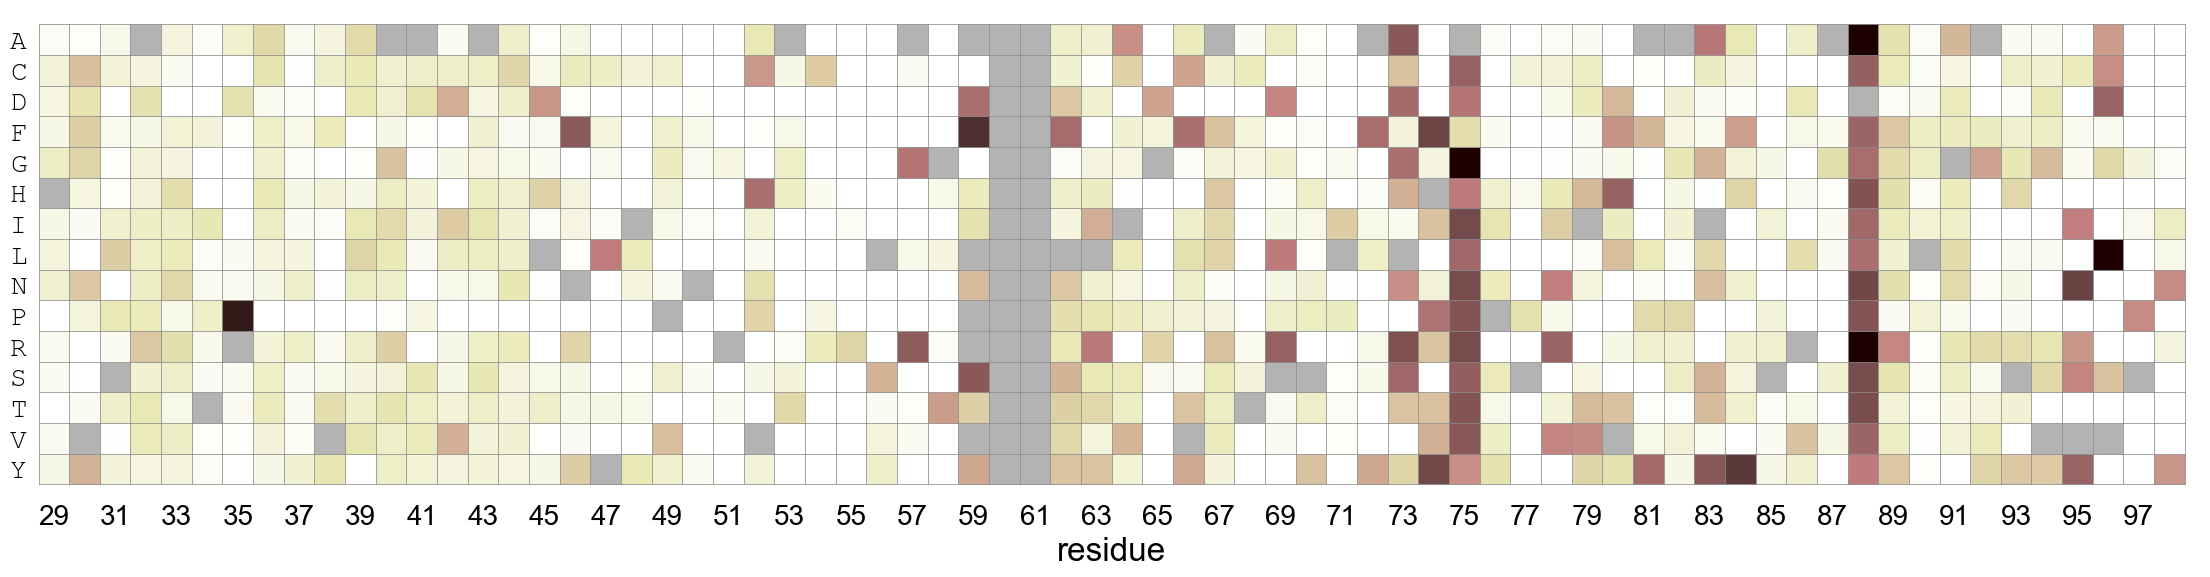

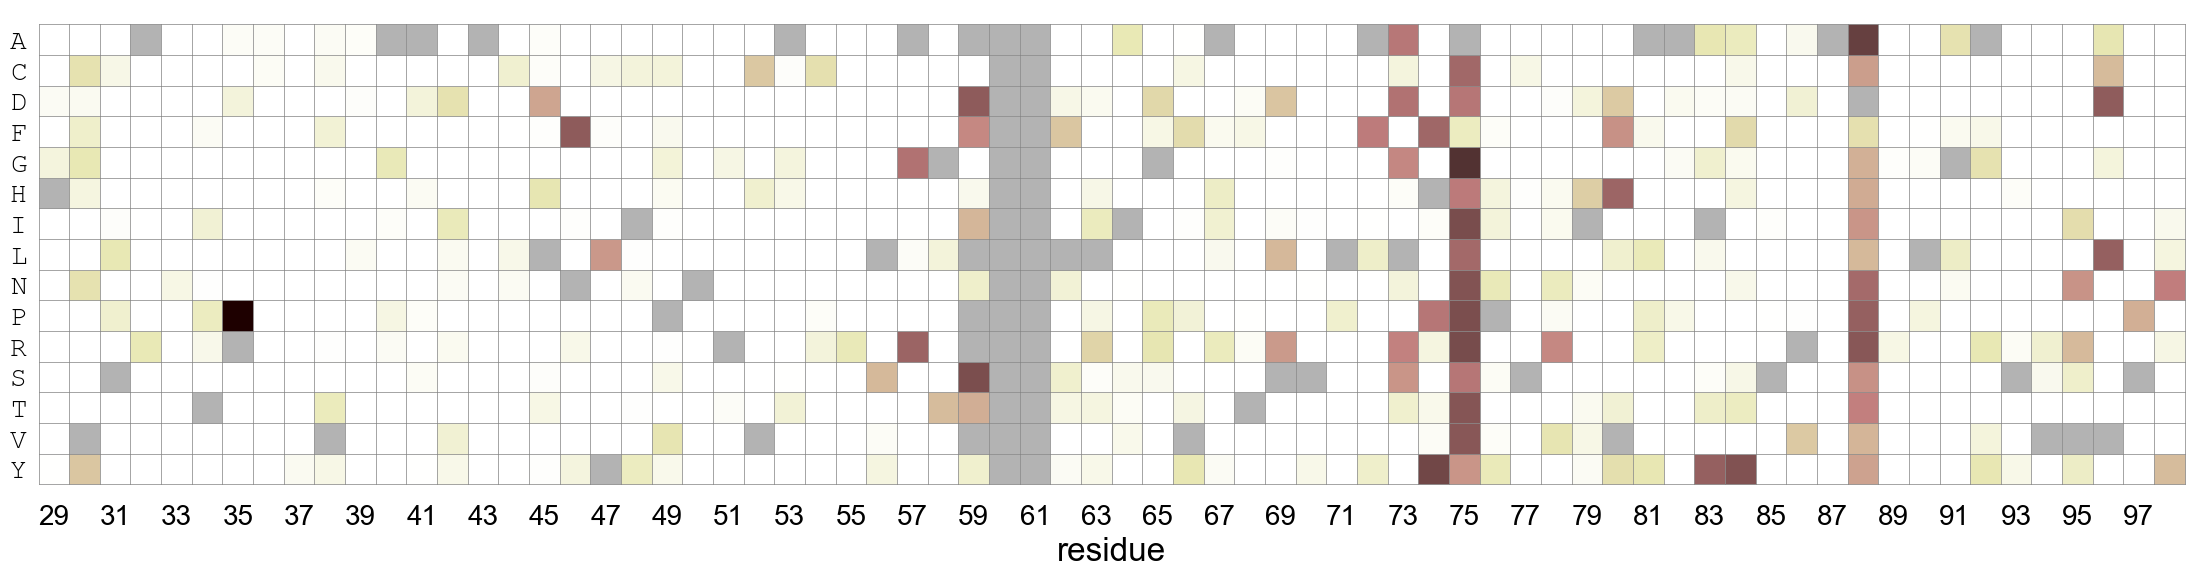

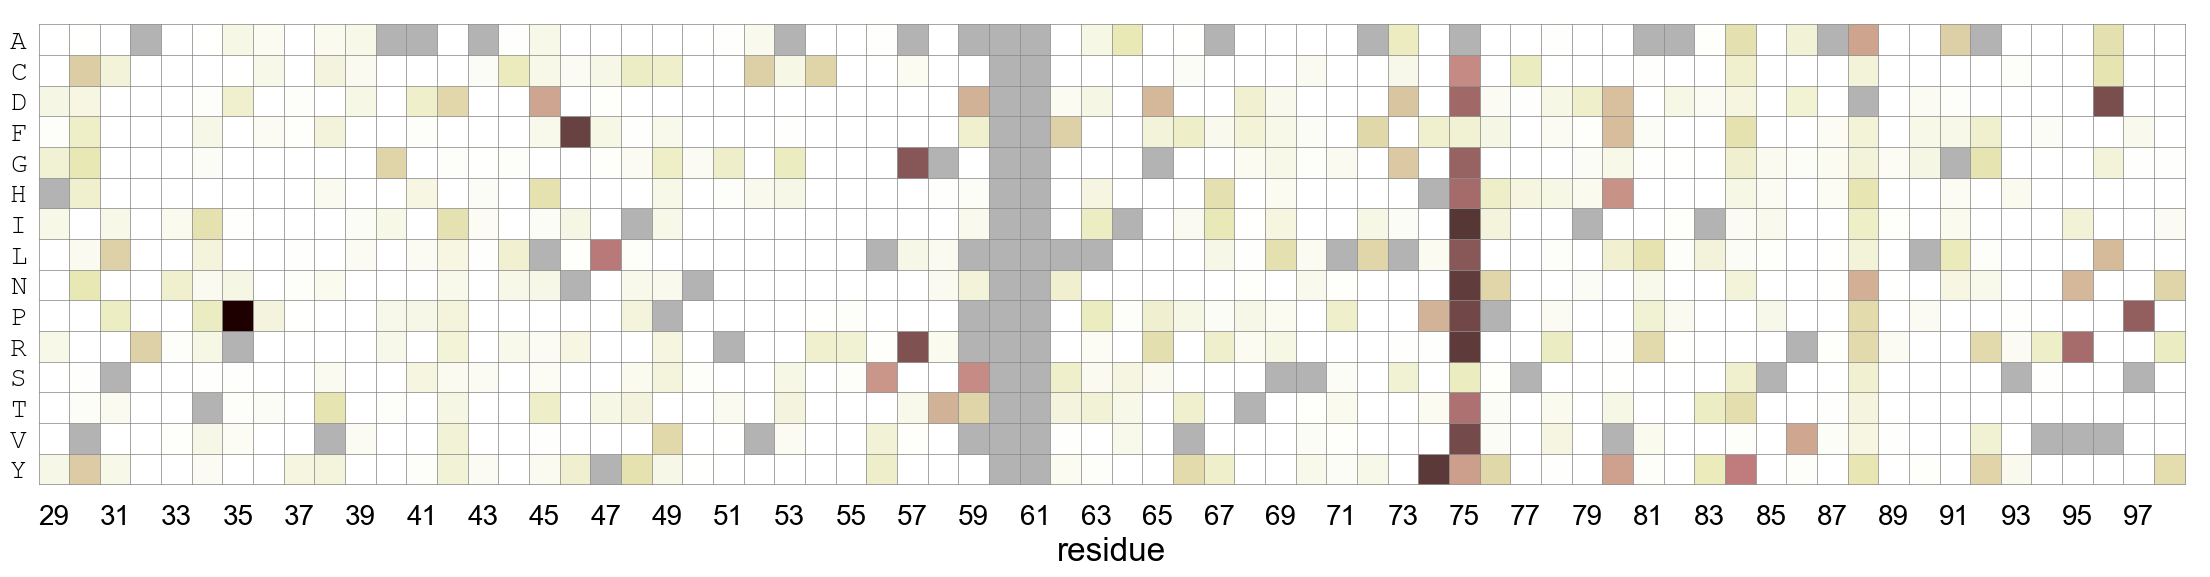

In [8]:
# Manually create a series of heatmaps for theta vs iptg

# Get a list of unique titrant concentrations
titr = pd.unique(single_df["titrant_conc"])
print(titr)
counter = 0
for conc in titr:

    # Grab dataframe at iptg == conc
    to_plot_df = single_df[single_df["titrant_conc"] == conc]

    # Put amino acids in columns and residues in rows.
    for_hm = to_plot_df.pivot_table(index="resid",
                                    columns="mut_aa",
                                    values="theta_est",
                                   )
    # Reverse-sort on columns so amino acids go top to bottom sorted
    for_hm = for_hm[for_hm.columns[::-1]]

    # Make sure residues are continuous
    for_hm = for_hm.reindex(np.arange(np.min(for_hm.index),
                                      np.max(for_hm.index)+1))

    # Create plot
    fig, ax = heatmap(for_hm,
                      color_fcn="pink_r",
                      vlim=[0.7,1.9],
                      x_axis_kwargs={"max_num_ticks":50},
                      plot_scale=False, # <- turn off scale bar
                      grid=True)
    ax.set_xlabel("residue",size=24,font="Arial")
    fig.tight_layout()
    #fig.savefig(f"step_{counter:05d}.png")
    plt.show()
    counter += 1
